## MLP

Exemplo adaptado de 
http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html


In [40]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [51]:
# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'hidden_layer_sizes':(100,)},
          {'solver': 'sgd', 'learning_rate': 'constant', 'learning_rate_init': 0.25, 'hidden_layer_sizes':(50,)}]

descriptions = ["constant learning-rate 0.01", 
                "constant learning-rate 0.25"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'}]


learning on dataset iris
	 constant learning-rate 0.01 - training set accuracy: 0.9714285714285714 | loss: 0.10137464911660335
	 constant learning-rate 0.01 - test set accuracy: 0.3111111111111111
	 constant learning-rate 0.25 - training set accuracy: 0.9714285714285714 | loss: 0.05375902724390683
	 constant learning-rate 0.25 - test set accuracy: 0.26666666666666666

learning on dataset digits
	 constant learning-rate 0.01 - training set accuracy: 0.9968178202068417 | loss: 0.03838350120228542
	 constant learning-rate 0.01 - test set accuracy: 0.9574074074074074
	 constant learning-rate 0.25 - training set accuracy: 1.0 | loss: 0.0045876848180375915
	 constant learning-rate 0.25 - test set accuracy: 0.9518518518518518


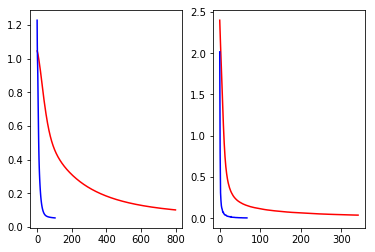

In [56]:
def plot_on_dataset(X, y, name, X_test, y_test):
    # for each dataset, plot learning for each learning strategy
    ax.set_title(name)
    
    # scale inputs
    X = MinMaxScaler().fit_transform(X)
    
    mlps = []
    max_iter = 1000

    # train
    for i,desc in enumerate(descriptions):
        mlp = MLPClassifier(verbose=0, random_state=0, max_iter=max_iter, **params[i])
        mlp.fit(X, y)
        mlps.append(mlp)
        print("\t {} - training set accuracy: {} | loss: {}".format(desc, mlp.score(X, y),mlp.loss_))
        print("\t {} - test set accuracy: {}".format(desc, mlp.score(X_test, y_test)))
    
    # plot training stats
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)

# load datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [('iris',   iris.data,   iris.target),
             ('digits', digits.data, digits.target)]

for i,d in enumerate(data_sets):
    name = d[0]
    data = d[1]
    target = d[2]

    print("\nlearning on dataset %s" % name)
    
    # split dataset
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.3, random_state=12345)

    plt.subplot(1, 2, i+1)
    plot_on_dataset(X=X_train, y=y_train, name=name, X_test=X_test, y_test=y_test)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

## Naive Bayes

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np


text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),])

text_clf_tfidf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'comp.graphics',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
print("%d documents" % len(twenty_train.filenames))
print("%d categories" % len(twenty_train.target_names))
print()


# #############################################################################
# fit data

text_clf.fit(twenty_train.data, twenty_train.target)  
text_clf_tfidf.fit(twenty_train.data, twenty_train.target)  



# #############################################################################
# evaluate
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
predicted_tfidf = text_clf_tfidf.predict(docs_test)

print(np.mean(predicted == twenty_test.target))
print(np.mean(predicted_tfidf == twenty_test.target))


Loading 20 newsgroups dataset for categories:
['alt.atheism', 'comp.graphics']
1064 documents
2 categories

0.9774011299435028
0.9703389830508474


In [68]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, 
                                    predicted, 
                                    target_names=twenty_test.target_names))

               precision    recall  f1-score   support

  alt.atheism       0.96      0.99      0.98       319
comp.graphics       0.99      0.97      0.98       389

  avg / total       0.98      0.98      0.98       708



In [69]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, 
                                    predicted_tfidf, 
                                    target_names=twenty_test.target_names))

               precision    recall  f1-score   support

  alt.atheism       0.95      0.99      0.97       319
comp.graphics       0.99      0.96      0.97       389

  avg / total       0.97      0.97      0.97       708



In [66]:
docs = ['God is love', 'OpenGL on the GPU is fast']
docs_preds = text_clf.predict(docs)
for i,doc in enumerate(docs):
    print('{} -> {}'.format(doc, twenty_train.target_names[docs_preds[i]]))
    

God is love -> alt.atheism
OpenGL on the GPU is fast -> comp.graphics
